In [168]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import utils # local file

plt.rc('text', usetex=True)
plt.rcParams['font.family'] = 'serif'
plt.rc('font', size=16)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [379]:
def calc_mean_std(x):
    return (np.mean(x), np.std(x, ddof=1) / np.sqrt(len(x)))

In [380]:
df_matches = pd.read_csv('./matches_with_network_params.csv', index_col=0)

In [381]:
df_matches[:3]

,MatchID,OpponentID,Outcome,OwnScore,OpponentScore,Side,CoachID,Huskies_network_params,Opponent_network_params
0,1,Opponent1,win,1,0,home,Coach1,"{'clustering_coeff': 0.09591148659543136, 'sho...","{'clustering_coeff': 0.12727017100674862, 'sho..."
1,2,Opponent2,tie,1,1,away,Coach1,"{'clustering_coeff': 0.13558418994397967, 'sho...","{'clustering_coeff': 0.15137551104001684, 'sho..."
2,3,Opponent3,loss,0,2,away,Coach1,"{'clustering_coeff': 0.12456657946374812, 'sho...","{'clustering_coeff': 0.1305149813894459, 'shor..."


## 赛区比赛结果

In [382]:
def color_func(p):
    if p > 0.2:
        return 'dodgerblue'
    elif p < 0.05:
        return 'orange'
    else:
        return 'seagreen'

In [383]:
ranking = {
    'Opponent14': 13,
    'Opponent13': 17,
    'Opponent15': 16,
    'Opponent17': 12,
    'Opponent18': 18,
    'Opponent16': 4,
    'Opponent2': 1,
    'Opponent1': 19,
    'Opponent8': 14,
    'Opponent7': 7,
    'Opponent11': 15,
    'Opponent12': 11,
    'Opponent9': 6,
    'Opponent10': 9,
    'Opponent19': 20,
    'Opponent4': 3,
    'Opponent5': 2,
    'Opponent6': 10,
    'Opponent3': 5
}

In [388]:
ranking = pd.Series(ranking)
ranking = ranking.sort_values()

In [389]:
ind = np.in1d(df_matches['OpponentID'], ranking[ranking <= 5].index.values)
df_win = df_matches.iloc[ind]

column = df_win['Huskies_network_params']
huskies_params = pd.DataFrame.from_dict({
    np.array(column.index)[ind]: eval(item)
    for ind, item in enumerate(column.values)
    }, orient='index')

column = df_win['Opponent_network_params']
oppo_params = pd.DataFrame.from_dict({
    np.array(column.index)[ind]: eval(item)
    for ind, item in enumerate(column.values)
    }, orient='index')

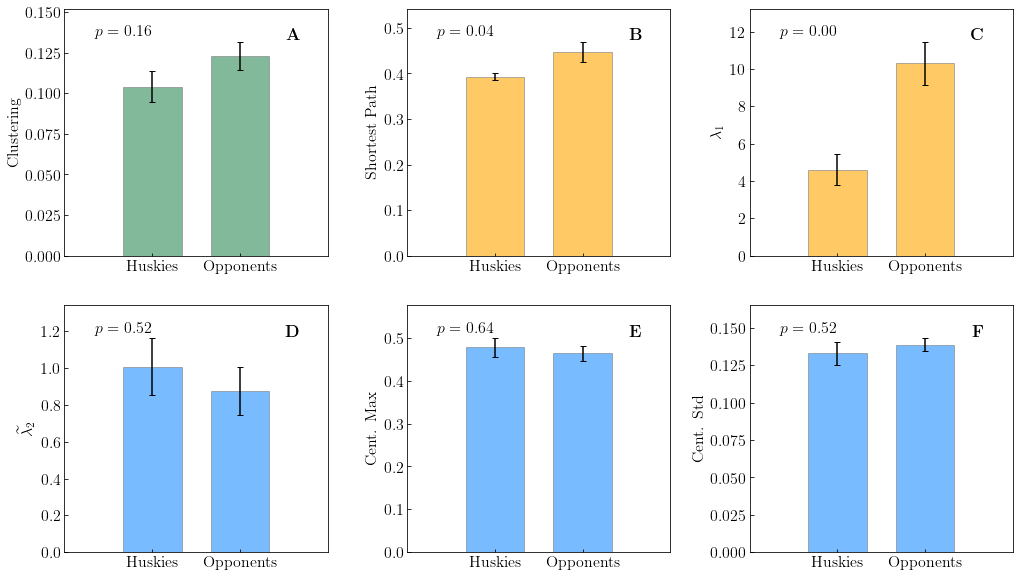

In [391]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))

ylabel_set = ['Clustering', 'Shortest Path', 
              r'$\lambda_1$', r'$\widetilde{\lambda_2}$', 
              'Cent. Max', 'Cent. Std']
tag_set = ['A', 'B', 'C', 'D', 'E', 'F']

for ind, column in enumerate(huskies_params.columns):
    ax = axes[ind // 3, ind % 3]
    
    huskie = calc_mean_std(huskies_params[column]) 
    oppo = calc_mean_std(oppo_params[column])
    
    levene = stats.levene(huskies_params[column].values, oppo_params[column].values)
    ttest = stats.ttest_ind(huskies_params[column].values, 
                            oppo_params[column].values, 
                            equal_var=(levene.pvalue > 0.10))
    pvalue = ttest.pvalue

    x_label = ['Huskies', 'Opponents']
    x_pos = [1.5, 3.0]
    
    ax.bar(x_pos, [huskie[0], oppo[0]], 
           yerr=[huskie[1], oppo[1]], 
           error_kw={'capsize': 3}, 
           width=1, color=color_func(pvalue), 
           edgecolor='gray',
           alpha=0.6)
    ylim = ax.get_ylim()
    ax.text(0.5, ylim[1] - (ylim[1] - ylim[0]) * 0.02, r'$p={:.2f}$'.format(pvalue))
    ax.set_xlim(0, 4.5)
    ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_label)
    ax.set_ylabel(ylabel_set[ind])
    ax.tick_params(direction='in')
    
    ax.text(3.9, ylim[1] - (ylim[1] - ylim[0]) * 0.02, 
            r'$\textbf{' + tag_set[ind] + '}$', 
            fontsize=17,
            fontweight='bold',
            horizontalalignment='center', 
            verticalalignment='center')
    
plt.subplots_adjust(wspace=0.3)

plt.savefig('./Draft/top6-network-params.pdf', dpi=200, bbox_inches='tight')
plt.savefig('./Draft/top6-network-params.png', dpi=200, bbox_inches='tight')

In [392]:
ind = np.in1d(df_matches['OpponentID'], ranking[ranking >= 15].index.values)
df_win = df_matches.iloc[ind]

column = df_win['Huskies_network_params']
huskies_params = pd.DataFrame.from_dict({
    np.array(column.index)[ind]: eval(item)
    for ind, item in enumerate(column.values)
    }, orient='index')

column = df_win['Opponent_network_params']
oppo_params = pd.DataFrame.from_dict({
    np.array(column.index)[ind]: eval(item)
    for ind, item in enumerate(column.values)
    }, orient='index')

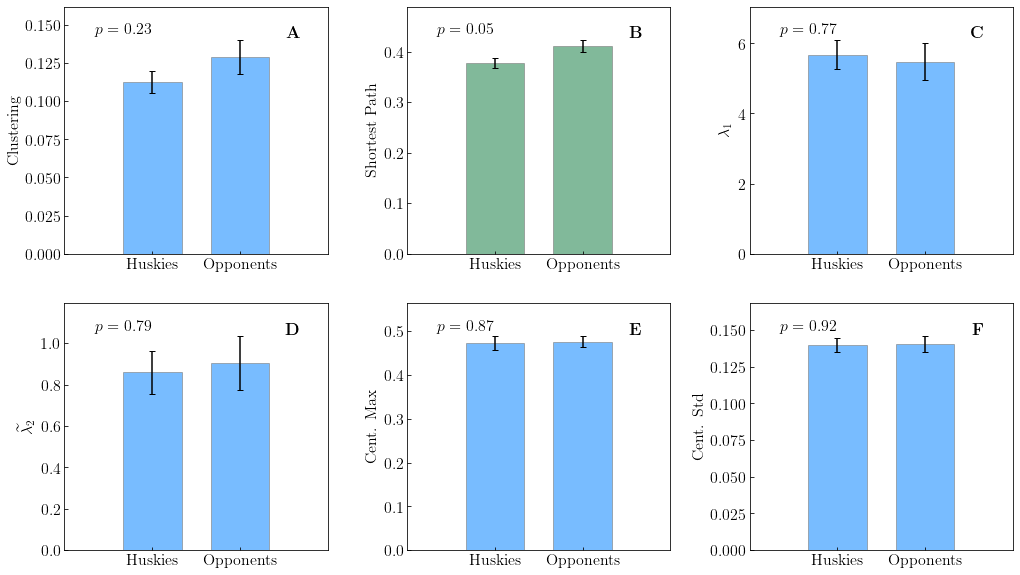

In [393]:
fig, axes = plt.subplots(2, 3, figsize=(17, 10))

ylabel_set = ['Clustering', 'Shortest Path', 
              r'$\lambda_1$', r'$\widetilde{\lambda_2}$', 
              'Cent. Max', 'Cent. Std']

tag_set = ['A', 'B', 'C', 'D', 'E', 'F']

for ind, column in enumerate(huskies_params.columns):
    ax = axes[ind // 3, ind % 3]
    
    huskie = calc_mean_std(huskies_params[column]) 
    oppo = calc_mean_std(oppo_params[column])
    
    levene = stats.levene(huskies_params[column].values, oppo_params[column].values)
    ttest = stats.ttest_ind(huskies_params[column].values, 
                            oppo_params[column].values, 
                            equal_var=(levene.pvalue > 0.10))
    pvalue = ttest.pvalue

    x_label = ['Huskies', 'Opponents']
    x_pos = [1.5, 3.0]
    
    ax.bar(x_pos, [huskie[0], oppo[0]], 
           yerr=[huskie[1], oppo[1]], 
           error_kw={'capsize': 3}, 
           width=1, color=color_func(pvalue), 
           edgecolor='gray',
           alpha=0.6)
    ylim = ax.get_ylim()
    ax.text(0.5, ylim[1] - (ylim[1] - ylim[0]) * 0.02, r'$p={:.2f}$'.format(pvalue))
    ax.set_xlim(0, 4.5)
    ax.set_ylim(ylim[0], ylim[0] + 1.1 * (ylim[1] - ylim[0]))
    ax.set_xticks(x_pos)
    ax.set_xticklabels(x_label)
    ax.set_ylabel(ylabel_set[ind])
    ax.tick_params(direction='in')
    
    ax.text(3.9, ylim[1] - (ylim[1] - ylim[0]) * 0.02, 
            r'$\textbf{' + tag_set[ind] + '}$', 
            fontsize=17,
            fontweight='bold',
            horizontalalignment='center', 
            verticalalignment='center')
    
plt.subplots_adjust(wspace=0.3)

plt.savefig('./Draft/bottom6-network-params.pdf', dpi=200, bbox_inches='tight')
plt.savefig('./Draft/bottom6-network-params.png', dpi=200, bbox_inches='tight')